## 📈 Food Prices and 💸 Affordability Project — Data Cleaning Notebook

This notebook documents the **data cleaning and preparation process** for the examination of food prices and affordability in Ireland between 2014 and 2024. The core dataset includes monthly retail prices for 41 food and non-alcoholic beverage items collected by the Central Statistics Office (CSO), complemented by median household disposable income data to support affordability analysis.  

The goal of this notebook is to ensure the data is:

- Structurally consistent.
- Free of missing or duplicate records.
- Standardized in measurement units (euro per kg or per litre).
- Ready for reliable exploratory and statistical analysis in next phases. 

Data sources referenced:

- **Central Statistics Office (CSO):** food price data and household income  
- **Health Service Executive (HSE) and Safefood Ireland:** for categorizing food healthiness (applied in later notebooks)

---

⚙️ **Objectives of this cleaning notebook**

- Load and inspect the raw data.
- Check and handle missing values.
- Check and handle duplicate records.
- Standardize units of measurement for price.
- Validate data structure and integrity before EDA.

---

After completing this data cleaning notebook, the cleaned dataset will be exported and used for further exploratory data analysis (EDA), feature engineering, and affordability modeling.

---

#### Libraries imported for the project. 

- All the necessary libraries for the present notebook will be imported in the next cell with the description.

In [1]:
# Importing Required Libraries

# Data manipulation and wrangling.
import pandas as pd          # Primary data handling library.
import numpy as np           # Numerical operations and arrays.

# Data visualization
import matplotlib.pyplot as plt   # Library for plotting.
import matplotlib.dates as mdates # Formatting time-based axes.
import missingno as msno          # Missing value visualization.

# Suppress warnings for a cleaner notebook presentation.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 🗂️ Food Dataset Introduction

The primary data source for this project is the National Average Prices table (CPM12) from the Central Statistics Office (CSO) of Ireland. This table reports monthly prices for various food items. The project focuses on data from 2014 to 2025 to analyze food price trends and affordability in Ireland.

---

### 🗃️ Dataset Source and License

- Publisher: CSO Ireland
- License: Creative Commons Attribution 4.0 (CC BY 4.0)
- Dataset link: [CSO CPM12 National Average Prices](https://data.gov.ie/dataset/cpm12-national-average-price)
- Documentation link: [CSO Price Methodology](https://www.cso.ie/en/methods/prices/consumerpriceindex/methodologydocuments/introductionofupdatedseriesbasedecember2023100/)


---

- The dataset was imported from the local machine after being collected from the CSO database.

**Data Dictionary**  
To ensure clarity and transparency, the following table describes the original features imported from the raw data sources. These definitions provide context for the variables used throughout the analysis and help establish a shared understanding before any transformations or feature engineering are applied.

| Variable             | Description                                                                 |
| -------------------- | --------------------------------------------------------------------------- |
| `STATISTIC Label`    | Label describing the measurement (typically “Average Price” or equivalent). |
| `Month`              | Month of observation (e.g., 2021M01 for Jan 2021).                          |
| `Consumer Item`      | Food item name as reported in the CSO dataset.                              |
| `UNIT`               | Unit of measurement (e.g., EUR, kilogram).                                  |
| `VALUE`              | Observed average price for the given month and item.                        |
| `Item`               | Food item name used in food tagging (matches `Consumer Item`).              |
| `Tag`                | Assigned health category for the food (Healthy, Unhealthy, Neutral).        |
| `Tag Source`         | Authority that defined the category (e.g., HSE or Safefood).                |
| `year`               | Calendar year.                                                              |
| `Median_Income_euro` | Estimated median household disposable income for the given year (in euro).  |

In [2]:
# Importing Dataset as food. 
food = pd.read_csv("../data/CPM12.20250617T120650.csv")

### 🧩 Data Understanding

- The following code combines the use of `.head()`, `.tail()`, and `.shape`  to display the first and last five observations, followed by the dataset's overall shape.

In [3]:
# Shows information about the dataset.
display(food)

,STATISTIC Label,Month,Consumer Item,UNIT,VALUE
0,National Average Price,2014 January,"White, self raising flour per 2 kg",Euro,2.308
1,National Average Price,2014 January,"Brown, wholemeal flour per 2 kg",Euro,2.971
2,National Average Price,2014 January,"Bread, white sliced pan, large (800g)",Euro,1.289
3,National Average Price,2014 January,"Bread, brown sliced pan, large (800g)",Euro,1.532
4,National Average Price,2014 January,Spaghetti per 500g,Euro,1.105
...,...,...,...,...,...
6571,National Average Price,2025 May,White granulated sugar per 1 kg,Euro,1.873
6572,National Average Price,2025 May,Jam per lb,Euro,1.047
6573,National Average Price,2025 May,Marmalade per lb,Euro,2.083
6574,National Average Price,2025 May,Tea bags per 80,Euro,3.339


In [4]:
# Displays the info of the table, similiar to schema.
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6576 entries, 0 to 6575
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  6576 non-null   object 
 1   Month            6576 non-null   object 
 2   Consumer Item    6576 non-null   object 
 3   UNIT             6576 non-null   object 
 4   VALUE            6054 non-null   float64
dtypes: float64(1), object(4)
memory usage: 257.0+ KB


In [5]:
# Returns the sum of NaN-values in all columns in the table.
food.isna().sum()

STATISTIC Label      0
Month                0
Consumer Item        0
UNIT                 0
VALUE              522
dtype: int64

- A missing-value matrix plot was created using the `missingno` library to visually confirm the structure of missingness across items and months. This makes it easier to detect any systematic gaps that might be hidden in the .isna().sum() table.

#### Dataset Description

The food table is composed by 6576 rows and 6 columns. 
- The first "column" the index. 
- Second is the statistic label 
- Third is the Month, recorded in Year-Month (type = Object)
- Forth column is the Consumer Item (type = Oject) represented by the list of food items.
- Fifth is what Unit is represented the VALUE column which is in Euro.
- The last is the VALUE which is the price of the items in € (decimal numeric type float64).
- Initial Missing Values Check showed 522 NaN-Values in the VALUE column.  

In [6]:
# Extract all unique items from the 'Consumer Item' column
unique_items = food['Consumer Item'].unique()

# Sort the list alphabetically for easier readability.
sorted_items = sorted(unique_items)

# Print each unique item.
print("📋 List of Unique Food Items:\n")
for item in sorted_items:
    print("-", item)

# Print the total count of unique food items.
print(f"\n🔢 Total Number of Unique Food Items: {len(sorted_items)}")

📋 List of Unique Food Items:

- Bananas per kg
- Best back rashers per kg
- Bread, brown sliced pan, large (800g)
- Bread, white sliced pan, large (800g)
- Broccoli per kg
- Brown, wholemeal flour per 2 kg
- Butter per lb
- Carrots per kg
- Cooked ham per kg
- Fresh fillet of cod per kg
- Fresh fillet of plaice per kg
- Fresh fillet of whiting per kg
- Fresh hake per kg
- Fresh salmon per kg
- Full fat milk per 2 litre
- Grapes per kg
- Ham fillet per kg
- Irish cheddar per kg
- Jam per lb
- Lamb - whole leg / half leg per kg
- Lamb gigot chops per kg
- Lamb loin chops per kg
- Lamb's liver per kg
- Large eggs per half dozen
- Low fat milk per 1 litre
- Marmalade per lb
- Medium eggs per half dozen
- Mushrooms per kg
- Onions per kg
- Orange juice per litre
- Pork loin chops per kg
- Pork sausages per kg
- Pork steak per kg
- Potatoes 10 kg
- Potatoes 2.5 kg
- Potatoes 7.5 kg
- Roast beef - topside or rib per kg
- Sirloin steak per kg
- Sliced / diced beef pieces per kg
- Smoked salmon

    The present project has only 48 items, a small number compare to what consumers can find at the shops. However, those items represent the most common goods Irish households shopping list.  


#### Descriptive Statistics (Raw food dataset)

In [7]:
# Shows the descriptive statistics of numeric columns.
food.describe()

,VALUE
count,6054.000000
mean,7.202121
std,7.276315
min,0.767000
25%,1.689250
50%,3.765500
75%,10.618000
max,38.015000


- In the current format, the statistical features of the VALUE (only numeric column) is not particulary meaningful at this stage. This is because the structure of the long format has all the values store in a single column, resulting in statistical features that represents the overall distribution of all prices combined. Thus, transformations were performed in later stages to extract more useful insights.

**The food prices statistical features were key to decide which type of dataset to use to analyse the afforadability, which is further showed and explained in the EDA section**.

## 🧼 Food Dataset Preparation and Cleaning

#### 1. Removing/Renaming columns and Adjusting Date feature.

After the initial observations the cleaning phase will start by: 
- Removing redundant data.
- Renaming columns.

Droping unnecessary coumns and renaming the final columns that are going to be used for the analysis, the new names are more explanatory and shorter, which is better when writting queries.  

In [8]:
# Drops the STATISTIC LABEL and UNIT column. 
food = food.drop(columns=['STATISTIC Label', 'UNIT'])

In [9]:
# Renaming the columns using a dictionary. 
food = food.rename(columns={
    'Consumer Item': 'Item',
    'VALUE': 'Price_euro'})

To analyse the behaviour of the prices overtime the Month column will have to be adjusted. 

- The first transformation was performed on the Month column was by changing the format from object (string) to datetime, enabling time-series operation required for the pipeline.
- The second step extract the year and the month.

In [10]:
# Transforming the Month column to datetime format.
food['Date'] = pd.to_datetime(food['Month'], format='%Y %B')

# Extract year and month for easy grouping later
food["Year"] = food["Date"].dt.year
food["Month_num"] = food["Date"].dt.month

# Check result
print(food[["Month", "Date", "Year", "Month_num"]].head())

          Month       Date  Year  Month_num
0  2014 January 2014-01-01  2014          1
1  2014 January 2014-01-01  2014          1
2  2014 January 2014-01-01  2014          1
3  2014 January 2014-01-01  2014          1
4  2014 January 2014-01-01  2014          1


In [11]:
# Display the first five rows to check the previous queries. 
food.head()

,Month,Item,Price_euro,Date,Year,Month_num
0,2014 January,"White, self raising flour per 2 kg",2.308,2014-01-01,2014,1
1,2014 January,"Brown, wholemeal flour per 2 kg",2.971,2014-01-01,2014,1
2,2014 January,"Bread, white sliced pan, large (800g)",1.289,2014-01-01,2014,1
3,2014 January,"Bread, brown sliced pan, large (800g)",1.532,2014-01-01,2014,1
4,2014 January,Spaghetti per 500g,1.105,2014-01-01,2014,1


At a first glance, the set returned missing values (NaN) and in order to have successful results at the end all the values must be filled. Therefore, the following step will analyse the NaN and their location. 

#### 2. Handling Missing Values and Duplicates

The total number of missing values is 522 and they are located in the VALUE column (item price). Thus, a examination of the NaN's were carried out to determine the adequate approach to handle them. 
The investigation was performed by following: 
- Identification of the number of NaN through the Items column, it will tell how many NaN each item have.
- The proportion in % of missing data is calculated (based on total number of obsevations for each item).

<Axes: >

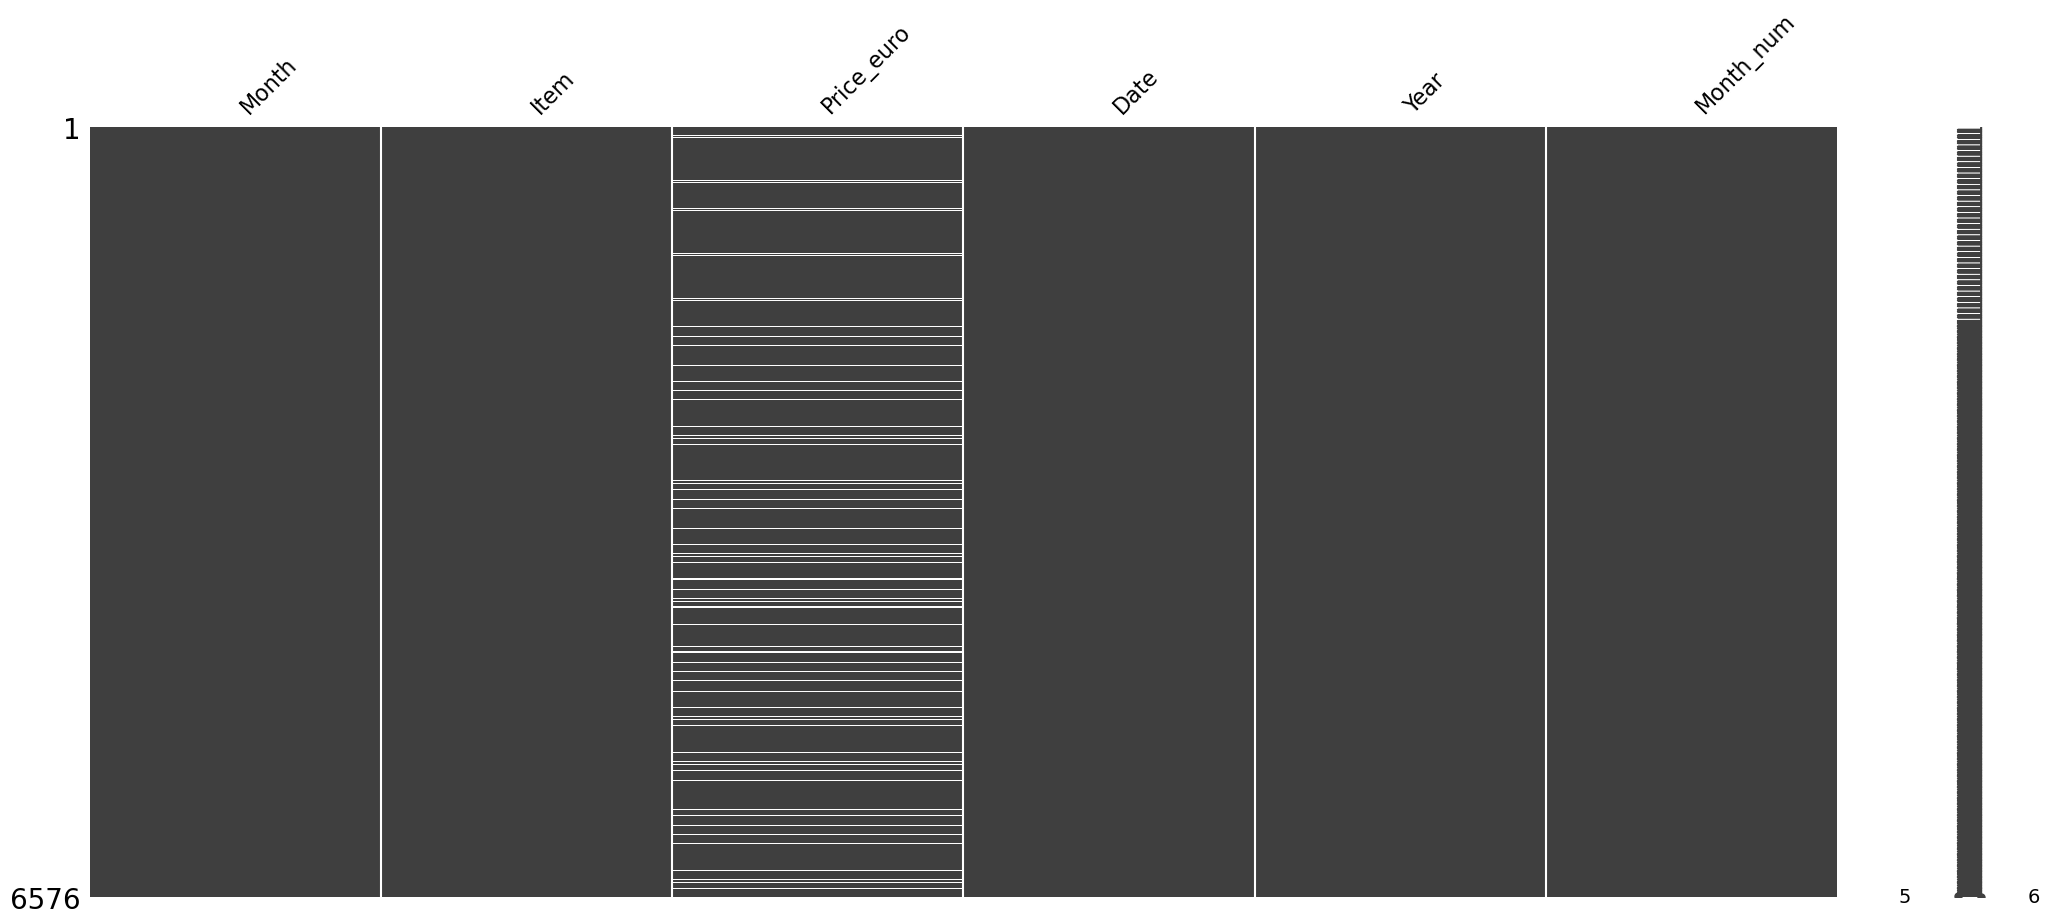

In [12]:
# Display the NaN Matrix plot.
msno.matrix(food) 

In [13]:
# Check for duplicates.
# A unique price should be for each Consumer Item + Date.
duplicates = food.duplicated(subset=["Item", "Date"]).sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [14]:
# Count missing values for each item in the 'Item' column.
missing_summary = food[food['Price_euro'].isna()]['Item'].value_counts()
print(missing_summary) # Prints the number of missing values per item.

Item
Lamb gigot chops per kg           102
Fresh fillet of plaice per kg     102
Fresh fillet of whiting per kg    102
Potatoes 10 kg                    102
Fresh hake per kg                  57
Potatoes 7.5 kg                    36
Lamb's liver per kg                21
Name: count, dtype: int64


In [15]:
# Counts the total number of rows per item.
total_counts = food['Item'].value_counts()

# Number of missing values per item (only those with NaNs).
missing_counts = food[food['Price_euro'].isna()]['Item'].value_counts()

# Creates a DataFrame with both count of NaN's and percentage.
missing_summary = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Total_Count': total_counts[missing_counts.index],
})
missing_summary['Missing_Percent'] = (missing_summary['Missing_Count'] / missing_summary['Total_Count']) * 100

# Sorts the results by descending order.
missing_summary = missing_summary.sort_values(by='Missing_Percent', ascending=False)

# Shows the result.
missing_summary

,Missing_Count,Total_Count,Missing_Percent
Item,,,
Lamb gigot chops per kg,102,137,74.452555
Fresh fillet of plaice per kg,102,137,74.452555
Fresh fillet of whiting per kg,102,137,74.452555
Potatoes 10 kg,102,137,74.452555
Fresh hake per kg,57,137,41.605839
Potatoes 7.5 kg,36,137,26.277372
Lamb's liver per kg,21,137,15.328467


**The missing data are not randomly distributed across the set, but is concentrated in a few items**: 
- Lamb gigot chops per kg, Fresh fillet of whiting per kg, Fresh fillet of plaice per kg, Potatoes 10 kg were the items with the most NaN values 102, which represents almost 75% of missing data.
- Fresh hake per kg, Potatoes 7.5 kg and Lamb's liver per kg still have more than 50% of useful data and further investigation was performed to decide how to handle them.

<b> With more than 70% missing data points, Lamb gigot chops per kg, Fresh fillet of whiting per kg, Fresh fillet of plaice per kg, Potatoes 10 kg were erased because even if any attempt to fill the NaN could potentially introduce unnecessary noisy to the analysis</b>. 

In [16]:
# Total number of months in the dataset.
total_months = food['Month'].nunique()

# Calculate the coverage (non-NaN ratio) per item.
item_coverage = food.groupby('Item')['Price_euro'].apply(lambda x: x.notna().sum() / total_months)

# Keep only items with at least 50% non-missing data.
valid_items = item_coverage[item_coverage >= 0.5].index

# Filter the main DataFrame.
food = food[food['Item'].isin(valid_items)]

In [17]:
# Recalculate coverage to confirm.
item_coverage = food.groupby('Item')['Price_euro'].apply(lambda x: x.notna().mean())

# Show the final retained items and their coverage
print(item_coverage.sort_values())

Item
Fresh hake per kg                        0.583942
Potatoes 7.5 kg                          0.737226
Lamb's liver per kg                      0.846715
Bananas per kg                           1.000000
Broccoli per kg                          1.000000
Brown, wholemeal flour per 2 kg          1.000000
Bread, brown sliced pan, large (800g)    1.000000
Best back rashers per kg                 1.000000
Carrots per kg                           1.000000
Cooked ham per kg                        1.000000
Fresh fillet of cod per kg               1.000000
Fresh salmon per kg                      1.000000
Full fat milk per 2 litre                1.000000
Grapes per kg                            1.000000
Butter per lb                            1.000000
Bread, white sliced pan, large (800g)    1.000000
Irish cheddar per kg                     1.000000
Ham fillet per kg                        1.000000
Lamb - whole leg / half leg per kg       1.000000
Jam per lb                               1.00

- With the four items erased the following step is to examine the Fresh hake per kg, Potatoes 7.5 kg and Lamb's liver per kg. The task is performed by creating line plots to identify the location of the NaN (if they are clustered or random).

**Note**: The following line plots serve only to detect missing-value patterns (consecutive NaNs), not to compare price magnitudes across items.

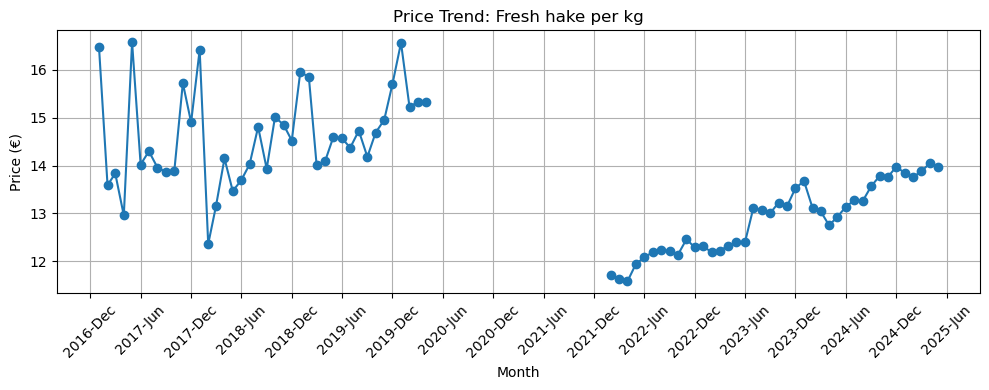

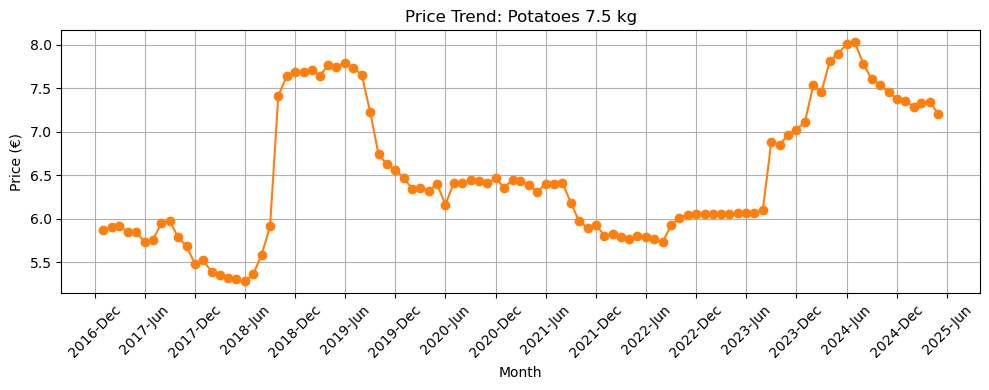

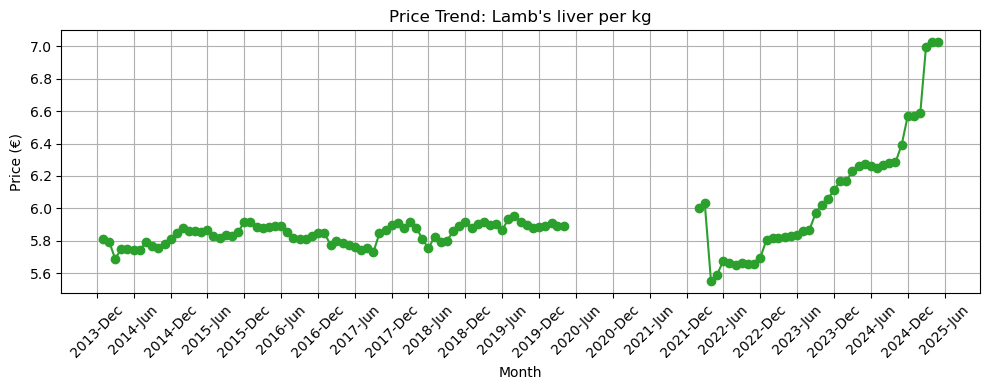

In [18]:

# Defines a list with the items to exanime:
items_to_check = [
    "Fresh hake per kg",
    "Potatoes 7.5 kg",
    "Lamb's liver per kg"]

# Define a color palette 
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, orange, green.

# Loop through each item and corresponding color.
for item, color in zip(items_to_check, colors):
    # Subset the dataframe for the current item.
    subset = food[food['Item'] == item]
    plt.figure(figsize=(10, 4)) # Sets the figure. 
    plt.plot(subset['Date'], subset['Price_euro'], marker='o', color=color) # Plot the price of the items over time. 
    plt.title(f"Price Trend: {item}") # Adds a Title  to the plot.
    plt.ylabel("Price (€)") # Sets the Price label.
    plt.xlabel("Month") # Sets the Month label.
    plt.grid(True) # Add grid in the back of the lineplot to enhance visualization.
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # show one tick every 6 months.
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%b"))  # format to "2024-Jan".
    plt.xticks(rotation=45) # Rotates x-laabels in 45º.
    plt.tight_layout() # Plots to fit the layout.
    plt.show() # Display the plot.

##### Fresh hake per kg, Potatoes 7.5 kg and Lamb's liver per kg NaN analysis:

- All three items have missing values clustered in a certain period, the fresh hake (missing from 2015 to 2017 and from 2020 to 2022), The potatoes 7.5 Kg (missing from 2014 to 2017), The lamb's liver (missing from early 2020 to early 2022).

<b> The three items have long consecutive gaps and to fill the gaps by interpolation, machine learning techniques could potentially distort future anylysis or mathematical/statistical calculations. Therefore, the items were also erased from the analysis</b>.

- The excluded items still have a "representant" in the list, the Lamb has other type of cuts, potatoes with other measures (2.5 Kg) and Hake with other type of fish. 

In [19]:
# Define a list of items to drop due to consecutive missing values.
drop_items = ["Fresh hake per kg", "Lamb's liver per kg", "Potatoes 7.5 kg"]

# Filter the DataFrame to exclude rows where 'Consumer Item' is in the drop list.
# The ~ operator negates the condition, keeping rows that are NOT in drop_items list.
food = food[~food['Item'].isin(drop_items)]

In [20]:
# Extract all unique items from the 'Consumer Item' column.
unique_items = food['Item'].unique()

# Sort the list alphabetically for easier readability.
sorted_items = sorted(unique_items)

# Print each unique item.
print("📋 List of Unique Food Items:\n")
for item in sorted_items:
    print("-", item)

# Print the total count of unique food items.
print(f"\n🔢 Total Number of Unique Food Items: {len(sorted_items)}")

📋 List of Unique Food Items:

- Bananas per kg
- Best back rashers per kg
- Bread, brown sliced pan, large (800g)
- Bread, white sliced pan, large (800g)
- Broccoli per kg
- Brown, wholemeal flour per 2 kg
- Butter per lb
- Carrots per kg
- Cooked ham per kg
- Fresh fillet of cod per kg
- Fresh salmon per kg
- Full fat milk per 2 litre
- Grapes per kg
- Ham fillet per kg
- Irish cheddar per kg
- Jam per lb
- Lamb - whole leg / half leg per kg
- Lamb loin chops per kg
- Large eggs per half dozen
- Low fat milk per 1 litre
- Marmalade per lb
- Medium eggs per half dozen
- Mushrooms per kg
- Onions per kg
- Orange juice per litre
- Pork loin chops per kg
- Pork sausages per kg
- Pork steak per kg
- Potatoes 2.5 kg
- Roast beef - topside or rib per kg
- Sirloin steak per kg
- Sliced / diced beef pieces per kg
- Smoked salmon per kg
- Spaghetti per 500g
- Striploin steak per kg
- Tea bags per 80
- Tomatoes per kg
- Tomatoes tinned per 400g
- Uncooked chicken medium size 1.6kg
- White granul

#### Validation

- The following section will validate the actions taken to handle missing values, as well as review the overall data preparation and cleaning process. The resuls are presented in a table format after the validation codes. 

In [21]:
# Returns the sum of NaN-values in all columns in the table.
food.isna().sum()

Month         0
Item          0
Price_euro    0
Date          0
Year          0
Month_num     0
dtype: int64

In [22]:
# Displays the info of the table, similiar to schema.
food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5617 entries, 0 to 6575
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       5617 non-null   object        
 1   Item        5617 non-null   object        
 2   Price_euro  5617 non-null   float64       
 3   Date        5617 non-null   datetime64[ns]
 4   Year        5617 non-null   int32         
 5   Month_num   5617 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(2)
memory usage: 263.3+ KB


In [23]:
# Recalculate coverage to confirm.
item_coverage = food.groupby('Item')['Price_euro'].apply(lambda x: x.notna().mean())

# Show the final retained items and their coverage.
print(item_coverage.sort_values())

Item
Bananas per kg                           1.0
Best back rashers per kg                 1.0
Bread, brown sliced pan, large (800g)    1.0
Bread, white sliced pan, large (800g)    1.0
Broccoli per kg                          1.0
Brown, wholemeal flour per 2 kg          1.0
Butter per lb                            1.0
Carrots per kg                           1.0
Cooked ham per kg                        1.0
Fresh fillet of cod per kg               1.0
Fresh salmon per kg                      1.0
Full fat milk per 2 litre                1.0
Grapes per kg                            1.0
Ham fillet per kg                        1.0
Irish cheddar per kg                     1.0
Jam per lb                               1.0
Lamb - whole leg / half leg per kg       1.0
Lamb loin chops per kg                   1.0
Large eggs per half dozen                1.0
Low fat milk per 1 litre                 1.0
Marmalade per lb                         1.0
Medium eggs per half dozen               1.0
Mushr

In [24]:
# Prints the first date record.
print(f"First date in dataset: {food['Date'].min()}")
# Prints the last date record.
print(f"Last date in dataset: {food['Date'].max()}")

# Checking if there are no missing months in the time series. 
expected_months = pd.date_range(start=food['Date'].min(), end=food['Date'].max(), freq="MS")
actual_months = food['Date'].unique()
missing_months = set(expected_months) - set(pd.to_datetime(actual_months))
# It will print the results based on the observation of missing months. 
if len(missing_months) == 0:
    print("✅ No missing months in the time series.")
else:
    print(f"⚠️ Missing months detected: {missing_months}")

First date in dataset: 2014-01-01 00:00:00
Last date in dataset: 2025-05-01 00:00:00
✅ No missing months in the time series.


- The validation stage showed that the columns are in the desired format and the dataset has no longer missing values.
- By excluding items with NaN values, the number of items reduced from 48 to 41.
- The data coverage of each food item is 100%.
- No missing time-series data. 

---

#### 3. Unit Standardization

After performing a thorough missing values assessment, the dataset is ready for the next stage and most important cleaning phase. The dataset still contains **heterogeneous measurement units** for food prices. Items are recorded in a mix of units such as “per 2 kg”, “per 500g”, “per lb”, “per litre”, and even per quantity (like half dozen eggs or 80 tea bags). Such inconsistency makes it challenging to compare prices directly across items or over time.

From a data analytics perspective, the ability to compare food prices in a standardized way is crucial to accurately measure affordability trends. Therefore, the next step is to apply a **unit standardization process**. The process will transform all prices to a consistent denominator: **euro per kilogram (for solids) or euro per litre (for liquids)**. The choice is motivated by the fact that kilograms and litres are the standard international SI units, and match most published economic and nutritional benchmarks. Items sold in counts (e.g., eggs or teabags) will retain their unit prices as there is no standard mass equivalent relevant to consumption in this analysis.

**3.1 Conversion Factors Documentation**

Below are the reference tables that guided the unit standardization process. These definitions ensure that food prices can be compared consistently across categories and time.

| Consumer Item                         | Unit embedded                   |
| ------------------------------------- | ------------------------------- |
| White, self raising flour per 2 kg    | 2 kg                            |
| Brown, wholemeal flour per 2 kg       | 2 kg                            |
| Bread, white sliced pan, large (800g) | 800 g                           |
| Bread, brown sliced pan, large (800g) | 800 g                           |
| Spaghetti per 500g                    | 500 g                           |
| Sirloin steak per kg                  | kg                              |
| Striploin steak per kg                | kg                              |
| Roast beef - topside or rib per kg    | kg                              |
| Sliced / diced beef pieces per kg     | kg                              |
| Pork loin chops per kg                | kg                              |
| Pork steak per kg                     | kg                              |
| Lamb - whole leg / half leg per kg    | kg                              |
| Lamb loin chops per kg                | kg                              |
| Uncooked chicken medium size 1.6kg    | 1.6 kg whole                    |
| Ham fillet per kg                     | kg                              |
| Cooked ham per kg                     | kg                              |
| Best back rashers per kg              | kg                              |
| Pork sausages per kg                  | kg                              |
| Fresh fillet of cod per kg            | kg                              |
| Fresh salmon per kg                   | kg                              |
| Smoked salmon per kg                  | kg                              |
| Full fat milk per 2 litre             | 2 litres                        |
| Low fat milk per 1 litre              | 1 litre                         |
| Irish cheddar per kg                  | kg                              |
| Large eggs per half dozen             | 6 eggs                          |
| Medium eggs per half dozen            | 6 eggs                          |
| Butter per lb                         | 0.454 kg (1 lb)                 |
| Grapes per kg                         | kg                              |
| Bananas per kg                        | kg                              |
| Tomatoes per kg                       | kg                              |
| Onions per kg                         | kg                              |
| Broccoli per kg                       | kg                              |
| Carrots per kg                        | kg                              |
| Mushrooms per kg                      | kg                              |
| Tomatoes tinned per 400g              | 400 g                           |
| Potatoes 2.5 kg                       | 2.5 kg                          |
| White granulated sugar per 1 kg       | kg                              |
| Jam per lb                            | 0.454 kg                        |
| Marmalade per lb                      | 0.454 kg                        |
| Tea bags per 80                       | 80 tea bags (categorical count) |
| Orange juice per litre                | 1 litre                         |

*Note: Items sold by unit count (eggs, tea bags) were not standardized because they are priced per unit rather than by weight or volume.*

---

**3.2 Conversion Factors**

| Item Example              | Conversion factor applied   |
| ------------------------- | --------------------------- |
| 2 kg flour                | price / 2                   |
| 800g bread                | price / 0.8                 |
| 500g spaghetti            | price / 0.5                 |
| 1.6kg chicken             | price / 1.6                 |
| 400g tinned tomatoes      | price / 0.4                 |
| butter 1 lb (0.454 kg)    | price / 0.454               |
| jam/marmalade per lb      | price / 0.454               |
| potatoes 2.5 kg           | price / 2.5                 |
| everything already per kg | price / 1                   |
| milk 2 litres             | price / 2                   |
| eggs (6)                  | leave as it is              |
| tea bags (80)             | leave as it is              |
| orange juice per litre    | leave as it is              |

**3.3 Why kilograms and litres?**

Kilograms (kg) and litres (l) are the International System of Units (SI) standard measurements for mass and volume, respectively. These units are globally accepted for food pricing and nutritional analysis because they allow clear aggregation, comparison, and conversion across virtually all product categories. Reporting in euro per kg or euro per litre aligns with best practices in economic, agricultural, and public health datasets.

The SI Brochure published by the International Bureau of Weights and Measures (BIPM) lays the foundation for using kilograms and litres as official units:  
- **BIPM SI Brochure (9th Edition, 2019):**  
  [https://www.bipm.org/en/publications/si-brochure](https://www.bipm.org/en/publications/si-brochure)

In [25]:
# Defining conversion factors.

# Items that use explicit standard conversion factors key is a substring to match in 'Item'.
conversion_factors = {
    "per 2 kg": 1/2,                    # price per kg.
    "per 2 litre": 1/2,                 # price per litre.
    "per 1 litre": 1/1,                 # Same measure.
    "per 800g": 1/0.8,                  # price per kg.
    "per 500g": 1/0.5,
    "per 400g": 1/0.4,
    "1.6kg": 1/1.6,
    "per 1 kg": 1/1,                    # per kg.
    "per kg": 1/1,                      # per kg.
    "per lb": 1/0.454,                  # pounds to kg.
    "2.5 kg": 1/2.5,
    "per half dozen": 1,                # leave as it is fir the eggs. 
    "per 80": 1,                        # Leave as it is for the teas.
    "per litre": 1/1}                   # default for juice (1L).

# Apply conversion factors.
# Defines a helper function.
def get_conversion(item_name):
    """
    Maps an item name to its conversion factor to a per kg or per litre price.
    Defaults to 1 if no match found (e.g. tea bags, eggs).
    """
    for key, factor in conversion_factors.items():
        if key in item_name:
            return factor
    return 1   # Default no conversion needed.

# Apply the factor.
food["conversion_factor"] = food["Item"].apply(get_conversion)

# New standardized price.
food["Price_per_kg_or_litre"] = food["Price_euro"] * food["conversion_factor"]

# Preview the results. 
food[["Item", "Price_euro", "conversion_factor", "Price_per_kg_or_litre"]].head(10)

,Item,Price_euro,conversion_factor,Price_per_kg_or_litre
0,"White, self raising flour per 2 kg",2.308,0.5,1.1540
1,"Brown, wholemeal flour per 2 kg",2.971,0.5,1.4855
2,"Bread, white sliced pan, large (800g)",1.289,1.0,1.2890
3,"Bread, brown sliced pan, large (800g)",1.532,1.0,1.5320
4,Spaghetti per 500g,1.105,2.0,2.2100
5,Sirloin steak per kg,16.287,1.0,16.2870
6,Striploin steak per kg,23.129,1.0,23.1290
7,Roast beef - topside or rib per kg,13.418,1.0,13.4180
8,Sliced / diced beef pieces per kg,10.585,1.0,10.5850
9,Pork loin chops per kg,8.116,1.0,8.1160


#### Unit Conversion Summary

The following unit conversions were applied:

| Pattern                  | Meaning                          | What happened?                 |
|--------------------------|----------------------------------|--------------------------------|
| `per 2 kg`                           | Price per 2 kg.                   | divided by 2 to get €/kg.                 |
| `per 800 g`                          | Price per 0.8 kg.                 | divided by 0.8 to get €/kg.               |
| `per 500 g`                          | Price per 0.5 kg.                 | divided by 0.5 to get €/kg.               |
| `per 2 litres`                       | Price per 2 litres.               | divided by 2 to get €/litre.              |
| `per 1 litre`                        | Price per 1 litre.               | no change.                                |
| `per 1.6 kg`                         | Price per 1.6 kg (whole chicken). | divided by 1.6 to get €/kg.               |
| `per half dozen`                     | Price per 6 eggs.                 | kept as is (categorical count, no change).|
| `per lb`                             | Price per 0.454 kg.               | divided by 0.454 to get €/kg.             |
| `per 400 g`                          | Price per 0.4 kg.                 | divided by 0.4 to get €/kg.               |
| `per 2.5 kg`                         | Price per 2.5 kg.                 | divided by 2.5 to get €/kg.               |
| `per 80 tea bags`                    | Price for 80 tea bags.            | kept as is (categorical count, no change).|
| `per kg`                             | Price per kg.                     | no change.                                |

**Notes:**
- Egg prices (per half dozen) and tea bag prices (per 80) were left **unchanged** because their count units do not easily convert to weight-based €/kg.
- These conversions were applied to ensure consistent €/kg or €/litre units, enabling a fair affordability analysis.
- A descriptive statistics check on the converted price column was performed to confirm if the values are within realistic ranges for food pricing, ensuring no conversion errors.

In [26]:
# Price summary statistics.
print(food["Price_per_kg_or_litre"].describe())

count    5617.000000
mean        7.092313
std         7.421632
min         0.839000
25%         1.514400
50%         3.512000
75%        10.399000
max        38.015000
Name: Price_per_kg_or_litre, dtype: float64


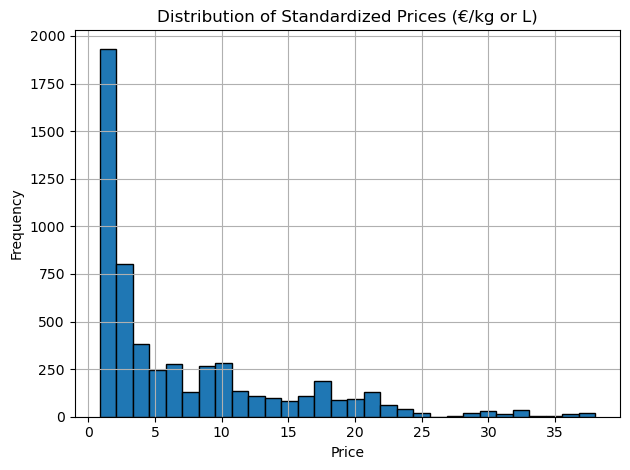

In [27]:
# Plot a histogram to inspect the distribution of standardized food prices.
plt.hist(
    food['Price_per_kg_or_litre'],  # Use the standardized price column (€/kg or L).
    bins=30,                        # Divide the range into 30 bins.
    edgecolor='black')              # Add black borders to each bar for visual clarity.

# Set the title of the plot
plt.title("Distribution of Standardized Prices (€/kg or L)")
# Label the x-axis and y-axis.
plt.xlabel("Price")                # X-axis represents price values (€/kg or L).
plt.ylabel("Frequency")           # Y-axis represents the count of occurrences per bin.
# Add a grid to improve readability.
plt.grid(True)                     # Help viewers align bar height with axis ticks.
# Automatically adjust subplot layout to avoid overlapping elements.
plt.tight_layout()                 # Prevents title/labels from being cut off.
# Display the plot.
plt.show()


### 📊 Validation Check: Price Distribution (€/kg or L)

To confirm that all price values have been correctly standardized and fall within a reasonable range, the distribution below visualizes all cleaned prices (€/kg or €/L).

This helps identify potential outliers or unit conversion issues that might have occurred during the cleaning process.

🧮 Observation:
- The majority of food items fall between **€1 and €10 per kg/L**, as expected.
- A long right tail represents high-cost items like premium-meats, daily-basis proteins.
- No negative or extreme outlier prices detected — cleaning step confirmed successful.

In [28]:
# Showcase 3 examples before and after unit standardization.
example_items = [
    "Spaghetti per 500g",
    "Tomatoes tinned per 400g",
    "Uncooked chicken medium size 1.6kg"]

# Pick a single snapshot month for clarity.
example_month = "2023 May"

# Filter exactly for that month.
snapshot = food[
    (food["Item"].isin(example_items)) &
    (food["Month"] == example_month)][["Item", "Price_euro", "Price_per_kg_or_litre"]]

# Display before and after clearly.
print(f"Examples for {example_month}:")
print(snapshot)

Examples for 2023 May:
                                    Item  Price_euro  Price_per_kg_or_litre
5380                  Spaghetti per 500g       1.457                2.91400
5390  Uncooked chicken medium size 1.6kg       5.770                3.60625
5415            Tomatoes tinned per 400g       1.056                2.64000


- As a final validation step, the cleaned dataset is reviewed for shape, data types, and a sample of the first rows to confirm readiness for further exploratory analysis.

In [29]:
# Final validation.
print(food.shape)
print(food.info())
print(food.head())

(5617, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 5617 entries, 0 to 6575
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Month                  5617 non-null   object        
 1   Item                   5617 non-null   object        
 2   Price_euro             5617 non-null   float64       
 3   Date                   5617 non-null   datetime64[ns]
 4   Year                   5617 non-null   int32         
 5   Month_num              5617 non-null   int32         
 6   conversion_factor      5617 non-null   float64       
 7   Price_per_kg_or_litre  5617 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(2), object(2)
memory usage: 351.1+ KB
None
          Month                                   Item  Price_euro       Date  \
0  2014 January     White, self raising flour per 2 kg       2.308 2014-01-01   
1  2014 January        Brown, wholemeal flour per

### ⏱️ Time Series Structure Check

Although this project is not focused on forecasting, many of the analyses rely on the assumption that price data is consistently recorded on a monthly basis.

Before proceeding with exploratory time series analysis, a structural check is performed to ensure that:
- Each food item has one price recorded per month.
- There are no missing or duplicated months.
- The time series are regular and complete.

This validation step ensures that trend and seasonality patterns can be explored reliably in the next (EDA) notebook.

In [30]:
# Pivot the data: rows = Date, columns = Item, values = price
pivot_food = food.pivot_table(index="Date", columns="Item", values="Price_per_kg_or_litre")

# Check how many months exist per item
monthly_counts = pivot_food.count()

# Total number of unique months in the dataset
total_months = pivot_food.shape[0]

# Compare: which items have less than full monthly coverage
incomplete_items = monthly_counts[monthly_counts < total_months]

# Displays the results.
print("Items with missing monthly data:\n")
print(incomplete_items.sort_values())

print("\n" + "-"*50 + "\n")  # Horizontal separator

# Check for duplicated months for each item
duplicates = food.duplicated(subset=["Date", "Item"], keep=False)
print("Duplicated rows per (Date, Item):", duplicates.sum())

Items with missing monthly data:

Series([], dtype: int64)

--------------------------------------------------

Duplicated rows per (Date, Item): 0


### 🧼 Data Cleaning Summary Table

The table below summarizes all the key cleaning steps applied to the dataset, including rationale and outcomes. After completing this process, the dataset is now fully structured, free of missing data, and ready for further analysis.

| Step | Action                                                                 | Rationale                                                                           | Outcome / Notes                                                                                  |
|------|------------------------------------------------------------------------|-------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| 1    | **Initial Filtering**: Selected only food and non-alcoholic items      | Focused the analysis on relevant food prices, excluding unrelated categories         | Reduced dataset scope, keeping only food-relevant records                                        |
| 2    | **Initial Inspection**: Checked dimensions, previewed head/tail, dtypes | Established basic data understanding and identified any immediate structural issues  | Understood data shape, column types, no surprises                                               |
| 3    | **Column Removal**: Dropped `STATISTIC Label`                          | Column was constant (“National Average Price”) and added no analytical value         | Removed redundant information                                                                    |
| 4    | **Column Renaming**: Standardized column names                         | Improved readability and ensured consistent naming across analysis steps             | Renamed to: `date`, `item_name`, `price_eur`                                                     |
| 5    | **Date Parsing**: Converted `Month` to a proper `datetime` field        | Enables correct time-series grouping and chronological sorting                       | Facilitated monthly/annual time-based analyses                                                   |
| 6    | **Missing Value Handling**: Dropped items with >70% missing values      | These items were too incomplete to reliably analyze or interpolate                   | Removed 4 items: *Lamb gigot chops, Fillet of whiting, Fillet of plaice, Potatoes 10 kg*         |
| 7    | **Gap Consistency**: Dropped items with >15 months consecutive gaps     | Long data gaps break time-series continuity and distort trend analysis               | Removed 3 items: *Fresh hake, Potatoes 7.5 kg, Lamb's liver*                                     |
| 8    | **Unit Standardization**: Converted to consistent euro per kg/litre     | Standardized heterogeneous units to enable fair price comparison                     | Added `price_per_kg_or_litre` field for consistent comparability                                 |
| 9    | **Final Validation**: Checked shape, data types, and null values        | Ensures a clean, analysis-ready data structure                                       | No remaining NaNs; consistent formatting verified                  
|
| 10   | **Time Series Structure Check**: Verified complete monthly sequences per item | Time series methods (e.g., decomposition) require regular frequency and no missing months | Identified items with irregular monthly data and verified series continuity before analysis      |

**The dataset is now ready for exploratory analysis, trend modeling, and affordability calculations.**

**Total rows removed** due to cleaning: 959  
**Total rows retained**: 5,617  
**Data retention rate**: approx. 85%  

After this data cleaning phase, the dataset is fully structured, missing data addressed, and standardized for further exploration. The next stage will focus on an Exploratory Data Analysis (EDA) to better understand patterns, detect trends, and validate the data prior to any feature engineering.



#### Dataset Version
- Cleaned food dataset  
- Last updated: July 2025

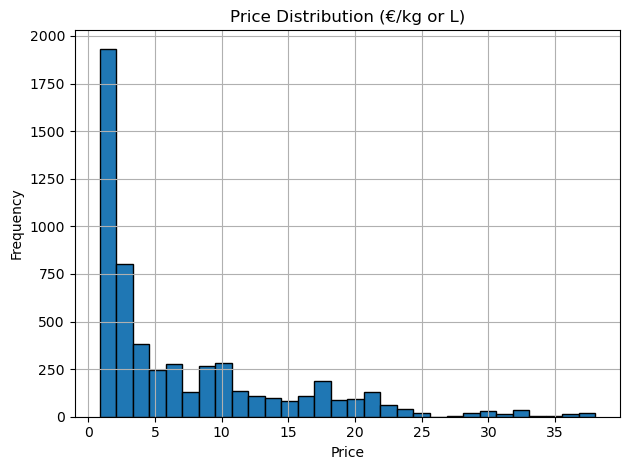

In [31]:
food['Price_per_kg_or_litre'].plot.hist(bins=30, edgecolor='black')
plt.title("Price Distribution (€/kg or L)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
# Saving the cleaned dataframe for EDA stage. 
food.to_csv("cleaned_food.csv", index=False)